In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

**Reading the data from the dataset**

In [125]:
data = pd.read_csv('wdbc.data')
col = data.columns
y = data.diagnosis
l = ['Unnamed: 32','id','diagnosis']
x = data.drop(l,axis = 1 )

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)
StandardScaler().fit_transform(x_train)
StandardScaler().fit_transform(x_test)
print("")

#**Running the Naive Bayes Classifier:**

Accuracy: 95.0000%


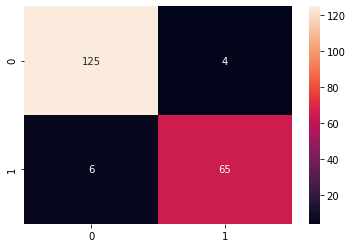

In [126]:
gauss = GaussianNB()
gauss.fit(x_train,y_train)
y_pred = gauss.predict(x_test)

print("Accuracy: {:.4%}".format(metrics.accuracy_score(y_test, y_pred)))
confusion_diag = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_diag,annot=True,fmt="d")

#**Running k-NN**

In [0]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
# x_train = StandardScaler().fit_transform(x_train)
# x_test = StandardScaler().transform(x_test)

**Running PCA on the data - different component numbers are taken into account**

In [0]:
components = 20
pca = PCA(n_components = components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)
explained_variance=pca.explained_variance_ratio_

**Running k-NN classifier, various metrics as well and weights were tested as well.**


**Weights tested: uniform, distance. 
Metrics tested: euclidean, manhattan, minkowski.**

In [129]:
knn_values = []
# weights tested: uniform, distance
# Metrics tested: euclidean, manhattan, minkowski 
# knn = KNeighborsClassifier(metric='manhattan',n_neighbors=9,weights='distance')

for i in range(1,30):     
    classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
    # trained_model=classifier.fit(x_train_pca,y_train)
    # trained_model.fit(x_train_pca,y_train )
    # y_pred = classifier.predict(x_test_pca)
    trained_model=classifier.fit(x_train,y_train)
    trained_model.fit(x_train,y_train )
    y_pred = classifier.predict(x_test)
    knn_values.append(accuracy_score(y_test, y_pred)*100)
print(knn_values)


[93.56725146198829, 94.15204678362574, 94.15204678362574, 95.32163742690058, 95.90643274853801, 95.32163742690058, 96.49122807017544, 96.49122807017544, 97.07602339181285, 95.90643274853801, 97.6608187134503, 97.07602339181285, 96.49122807017544, 96.49122807017544, 96.49122807017544, 96.49122807017544, 96.49122807017544, 95.90643274853801, 95.90643274853801, 95.32163742690058, 95.32163742690058, 95.32163742690058, 95.32163742690058, 94.73684210526315, 94.73684210526315, 94.73684210526315, 94.73684210526315, 94.73684210526315, 94.73684210526315]


**Plotting accuracy for every value of k taken:**

Text(0, 0.5, 'Accuracy')

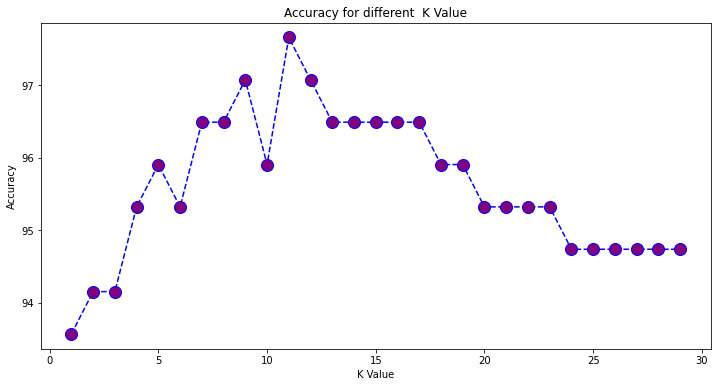

In [130]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30),knn_values, color='blue', linestyle='dashed', marker='o', markerfacecolor='purple', markersize=12)
plt.title('Accuracy for different  K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 

#**Running Support Vector Machine on the dataset:**

In [0]:
classifier = SVC(kernel = 'linear', random_state = 42)
trained_model=classifier.fit(x_train,y_train)
trained_model.fit(x_train,y_train )

# Predicting the Test set results
y_pred = classifier.predict(x_test)

Support vector Machine
Accuracy score of training data 96.4824%: 
Accuracy score of testing data 96.4912%: 


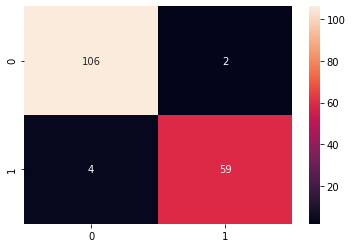

In [132]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_diag_svm = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_diag_svm,annot=True,fmt="d")
print("Support vector Machine")
print("Accuracy score of training data {:.4%}: ".format(accuracy_score(y_train, trained_model.predict(x_train))))
print("Accuracy score of testing data {:.4%}: ".format(accuracy_score(y_test, y_pred)))